In [8]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Read in the raw data

In [6]:
# Read in the excel file
raw_data = pd.read_excel('Wind_data.xlsx', sheet_name='Train')

In [71]:
raw_data.shape

(3635, 118)

# Create extra columns

In [25]:
# Create Time, Day, Month, Year Column for the data
raw_data['Time'] = raw_data['DATETIME'].astype(str).apply(lambda x: int(x.split()[-1].split(':')[0]))
raw_data['Year'] = raw_data['DATETIME'].astype(str).apply(lambda x: int(x.split()[0].split('-')[0]))
raw_data['Month'] = raw_data['DATETIME'].astype(str).apply(lambda x: int(x.split()[0].split('-')[1]))
raw_data['Day'] = raw_data['DATETIME'].astype(str).apply(lambda x: int(x.split()[0].split('-')[2]))

# Plot & Analyze the target variable

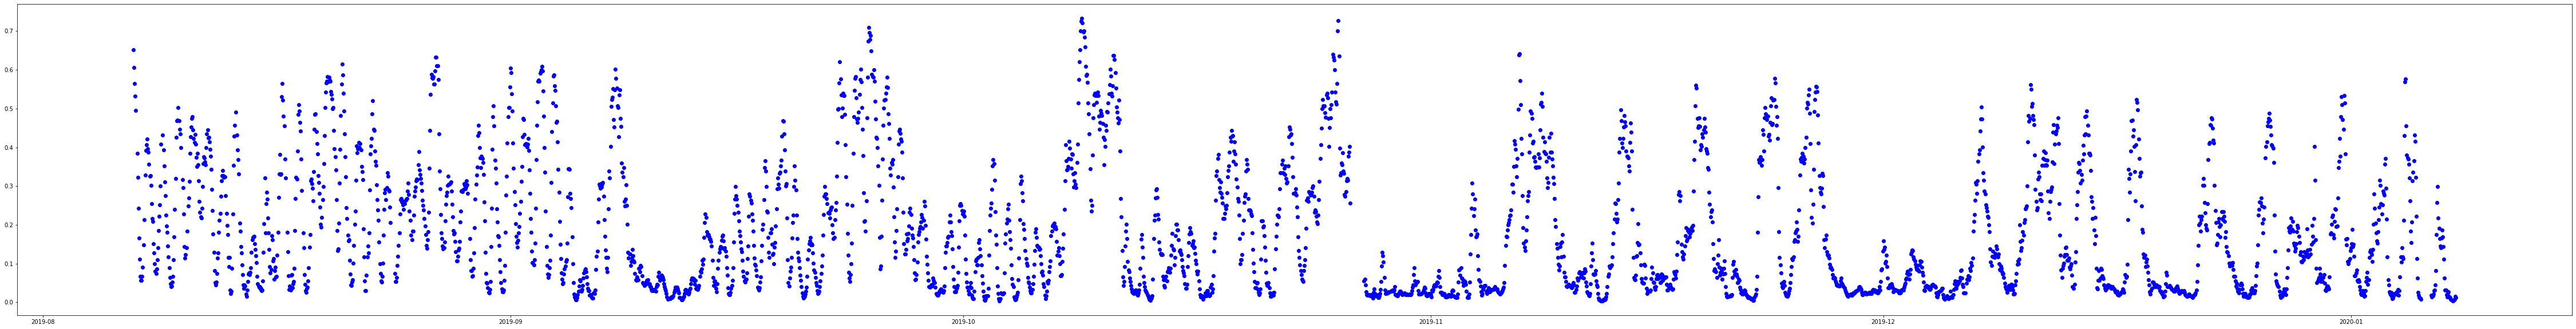

In [40]:
# Take a look at the target data
plt.figure(figsize=(80,10))
plt.plot(raw_data['DATETIME'].to_numpy(), raw_data['CF'].to_numpy(),'bo')

In [58]:
# Get each month's average
raw_data.groupby('Month')['CF'].mean()

Month
1     0.131850
8     0.256970
9     0.200384
10    0.191822
11    0.158500
12    0.149290
Name: CF, dtype: float64

In [64]:
# The max of each month
max_CF = raw_data.groupby('Month')['CF'].max().reset_index(name='CF')
max_CF

,Month,CF
0,1,0.576868
1,8,0.652524
2,9,0.708673
3,10,0.733128
4,11,0.641079
5,12,0.561047


In [62]:
# Get the multiplier of the max against the mean
raw_data.groupby('Month')['CF'].max()/raw_data.groupby('Month')['CF'].mean()

Month
1     4.375179
8     2.539304
9     3.536576
10    3.821918
11    4.044651
12    3.758103
Name: CF, dtype: float64

In [66]:
# See if the maximum usually happens at the same time during the day
raw_data.merge(max_CF, on=['Month','CF'])

,DATETIME,CF,WS_1133733,WS_1156770,WS_1156968,WS_1182195,WS_1193865,WS_1321569,WS_1324653,WS_1358699,...,WS_883683,WS_883699,WS_914573,WS_918665,WS_920775,WS_921049,Time,Year,Month,Day
0,2019-08-07 00:00:00,0.652524,10.35,8.99,4.57,9.69,8.90,2.90,5.74,1.16,...,10.72,10.55,11.41,10.77,10.17,9.24,0,2019,8,7
1,2019-09-24 18:00:00,0.708673,8.53,7.23,6.20,6.59,10.22,4.29,9.33,3.65,...,12.07,9.46,9.04,11.41,11.25,9.62,18,2019,9,24
2,2019-10-08 21:00:00,0.733128,10.65,9.61,3.75,9.17,8.98,4.23,3.25,1.65,...,12.43,10.58,11.13,12.10,11.64,9.78,21,2019,10,8
3,2019-11-06 21:00:00,0.641079,11.19,9.44,3.46,17.33,5.54,5.92,4.11,8.96,...,13.64,12.71,19.04,12.63,12.98,10.41,21,2019,11,6
4,2019-12-10 18:00:00,0.561047,8.96,6.89,6.99,9.16,8.89,1.32,3.87,1.56,...,12.87,9.79,11.26,13.83,12.77,11.71,18,2019,12,10
5,2020-01-04 15:00:00,0.576868,2.06,1.67,9.20,2.50,12.16,2.94,7.06,2.17,...,11.93,2.16,3.03,12.00,12.03,10.53,15,2020,1,4


# Check for any missing data points

In [70]:
# Check for any missing data
raw_data.isnull().values.any()

False

In [42]:
# Get the min-max of the date range
print(raw_data['DATETIME'].min())
print(raw_data['DATETIME'].max())

2019-08-07 00:00:00
2020-01-07 23:00:00


In [50]:
# Check what is the month in between
print(raw_data.groupby('Year')['Month'].unique())
# Check if there is any missing day of a month
print(raw_data.groupby(['Year','Month'])['Day'].nunique())
# If there is any missing timestamp during the day
time_count = raw_data.groupby(['Year','Month','Day'])['Time'].nunique().reset_index(name='Cnt_of_Time')
time_count[time_count['Cnt_of_Time']<24]

Year
2019    [8, 9, 10, 11, 12]
2020                   [1]
Name: Month, dtype: object
Year  Month
2019  8        25
      9        30
      10       31
      11       30
      12       31
2020  1         7
Name: Day, dtype: int64


,Year,Month,Day,Cnt_of_Time
0,2019,8,7,22
1,2019,8,8,22
3,2019,8,10,21
6,2019,8,13,22
10,2019,8,17,22
11,2019,8,18,23
17,2019,8,24,18
18,2019,8,25,23
22,2019,8,29,22
80,2019,10,26,17


<AxesSubplot:>

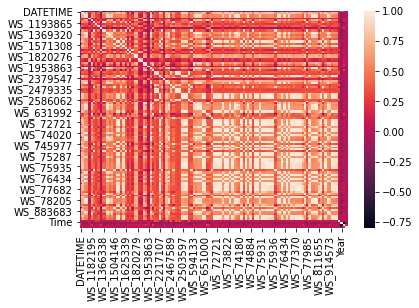

In [56]:
# Get correlation matrix heat map
sb.heatmap(raw_data.corr())

# Check for Outliers

In [72]:
raw_data.describe()

,DATETIME,CF,WS_1133733,WS_1156770,WS_1156968,WS_1182195,WS_1193865,WS_1321569,WS_1324653,WS_1358699,...,WS_883683,WS_883699,WS_914573,WS_918665,WS_920775,WS_921049,Time,Year,Month,Day
count,3635,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,...,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000,3635.000000
mean,2019-10-22 23:15:08.170564096,0.186114,4.532563,3.943094,5.124113,5.118909,5.558190,2.524281,3.927272,3.388721,...,6.083490,4.860514,5.756882,5.958355,5.699761,5.435894,11.519670,2019.041816,9.713067,15.716919
min,2019-08-07 00:00:00,0.003551,0.590000,0.490000,0.680000,0.460000,0.530000,0.500000,0.310000,0.240000,...,0.640000,0.650000,0.740000,0.700000,0.490000,0.560000,0.000000,2019.000000,1.000000,1.000000
25%,2019-09-14 17:30:00,0.043264,2.230000,2.050000,2.870000,2.790000,3.310000,1.490000,1.840000,1.350000,...,3.370000,2.490000,3.130000,3.310000,3.240000,3.215000,6.000000,2019.000000,9.000000,8.000000
50%,2019-10-22 14:00:00,0.130778,3.660000,3.220000,4.780000,4.490000,5.360000,2.010000,3.340000,2.460000,...,5.430000,3.940000,5.050000,5.280000,5.110000,5.110000,12.000000,2019.000000,10.000000,16.000000
75%,2019-11-30 08:30:00,0.299374,6.580000,5.500000,6.860000,6.560000,7.660000,2.980000,5.770000,4.400000,...,8.245000,6.810000,7.740000,8.060000,7.635000,7.110000,17.000000,2019.000000,11.000000,23.000000
max,2020-01-07 23:00:00,0.733128,14.660000,13.130000,14.640000,23.040000,17.430000,13.200000,11.810000,19.150000,...,19.800000,15.990000,22.660000,18.910000,16.640000,18.080000,23.000000,2020.000000,12.000000,31.000000
std,NaN,0.165140,2.790853,2.371923,2.712505,3.213767,2.691479,1.655931,2.398751,2.834749,...,3.387885,2.961514,3.496837,3.318751,3.143495,2.796631,6.913319,0.200195,2.270612,8.824026
